In [0]:
!pip3 install mtcnn

     |████████████████████████████████| 2.3MB 6.5MB/s 
  Created wheel for mtcnn: filename=mtcnn-0.0.9-cp36-none-any.whl size=2257692 sha256=8301da777cedeb02a9d57c06f8280a5a60ee99b47616273e701855d95864d108
  Stored in directory: /root/.cache/pip/wheels/85/81/65/6363fa5aafd7a155c896591e0c7c6e27b69642aa82b9cbf076
Successfully built mtcnn


In [0]:
from mtcnn.mtcnn import MTCNN
import cv2
from google.colab.patches import cv2_imshow

In [0]:
path = r'/content/WhatsApp Image 2019-08-25 at 7.36.41 PM.jpeg'
font = cv2.FONT_HERSHEY_SIMPLEX

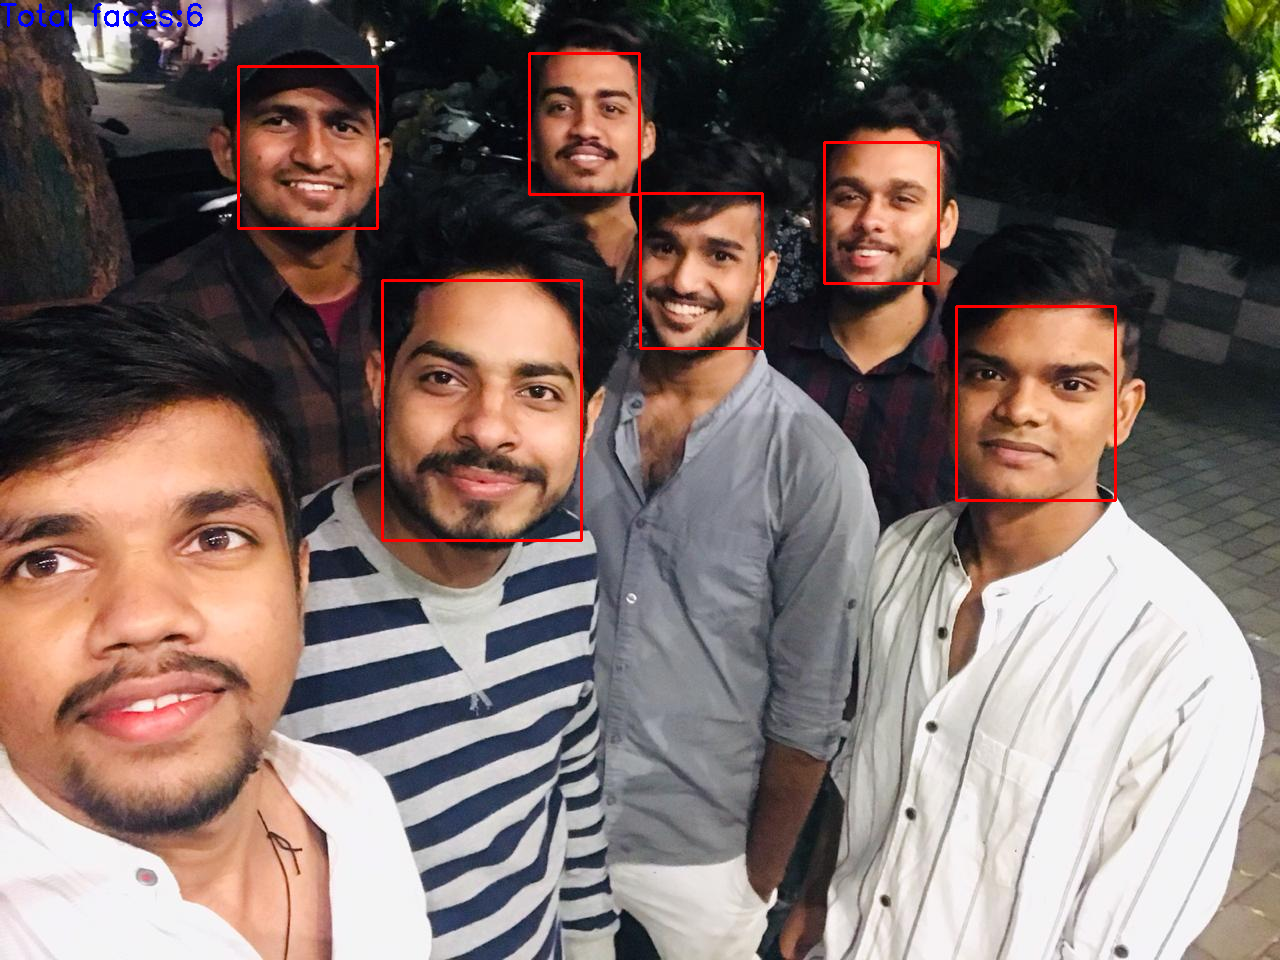

In [0]:
img = cv2.imread(path)
detector = MTCNN()
detect = detector.detect_faces(img)
l = []
for i in detect:
  box = i['box']
  l.append(box)
total_faces = len(l)
total_faces = 'Total faces:'+str(total_faces)
for j in l:
  x=j[0]
  y=j[1]
  w=j[2]
  h=j[3]
  cv2.rectangle(img , (x,y) , (x+w,y+h) , (0,0,255) , 2)
cv2.putText(img,total_faces,(0,25),font,1,(255,0,0),2)
cv2_imshow(img)

In [0]:
print (l)

[[433, 129, 28, 38], [486, 98, 29, 36], [58, 67, 31, 40], [52, 125, 32, 44], [219, 45, 29, 38], [315, 117, 34, 44], [207, 119, 31, 39], [145, 95, 32, 42], [284, 82, 29, 38], [543, 138, 35, 42], [380, 83, 31, 42]]


In [0]:
import numpy as np
import cv2
import tensorflow as tf

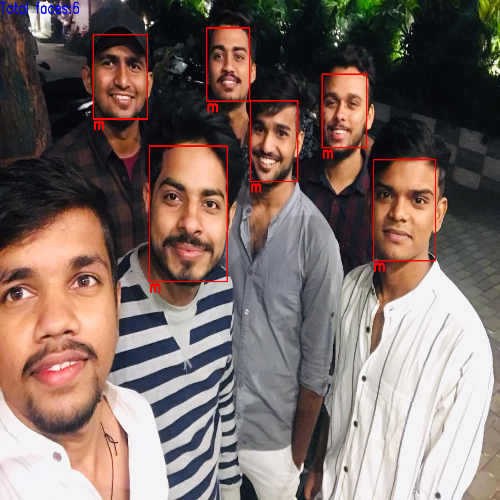

In [0]:
#section = (52, 125, 32, 44)
#(x,y,w,h) =section

model = tf.keras.models.load_model("32x3-CNN.model")

for i in l:
  section = i
  (x,y,w,h) =section
  section = img[y:y+h,x:x+w]
  CATEGORIES = ["m", "f"]
  section_img = cv2.resize(section,(50,50),interpolation=cv2.INTER_AREA)
  section_img = section_img.reshape(-1, 50, 50, 1)
  prediction = model.predict(section_img)
  gender = (CATEGORIES[int(prediction[0][0])])
  cv2.putText(img,gender,(x,y+h+20),font,1,(0,0,255),3)
while True:
  resize = cv2.resize(img,(500,500))
  #cv2_imshow(section)
  cv2_imshow(resize)
  break